In [1]:
!pwd

/content


In [2]:
!mkdir emotion_detection_project

In [3]:
cd emotion_detection_project

/content/emotion_detection_project


In [4]:
from google.colab import files
upload = files.upload()

Saving archive (1).zip to archive (1).zip


In [5]:
import zipfile
import io

# Extract the contents of the uploaded zip file
for fn in upload.keys():
    with zipfile.ZipFile(io.BytesIO(upload[fn]), 'r') as zip_ref:
        zip_ref.extractall("/content/emotion_detection_project/")  # Change the directory as needed


In [ ]:
##import os

# Specify the directory path
directory_path = '/content/drive/My Drive/test/train'  # Change this to your directory path

# List all files and directories in the specified path
contents = os.listdir(directory_path)

# Print the contents
print(contents)


[]


In [ ]:
# #Specify the directory path
directory_path = '/content/drive/My Drive/test/train'  # Change this to your directory path

# Use the ls command to list the contents of the directory
!ls "{directory_path}"


In [ ]:
##from google.colab import drive
##import shutil

# Mount Google Drive
##drive.mount('/content/drive')

# Define source and destination paths
##source_folder_path = '/content/emotion_detection_project'  # Change this to your source folder path
##destination_folder_path = '/content/drive/My Drive/test/train'  # Change this to your destination folder path in Google Drive

# Copy folder recursively
##shutil.copytree(source_folder_path, destination_folder_path)

##print("Folder copied successfully to Google Drive!")


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path of the folder to check
folder_path = '/content/drive/My Drive/test/train'  # Change this to the path of the folder you want to check

# Check if the folder exists
if os.path.exists(folder_path):
    print("Folder exists in Google Drive.")
else:
    print("Folder does not exist in Google Drive.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder exists in Google Drive.


In [6]:
import matplotlib.pyplot as plt
import os
import random
from glob import glob
import cv2
%matplotlib inline

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)



Tensorflow version: 2.15.0


In [ ]:
# Exploring Dataset

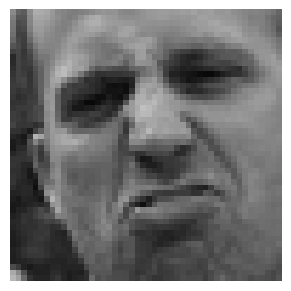

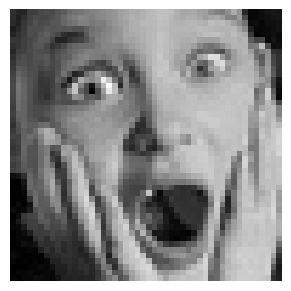

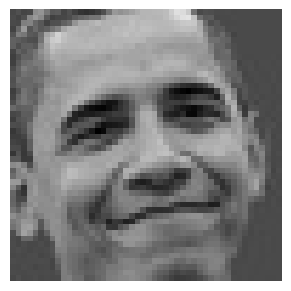

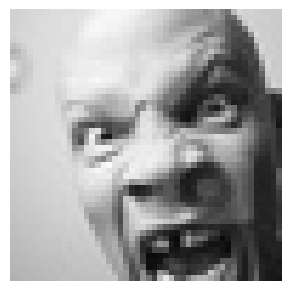

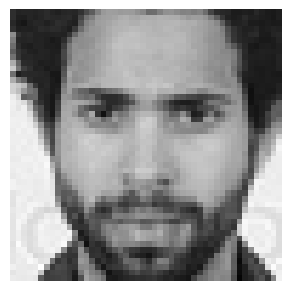

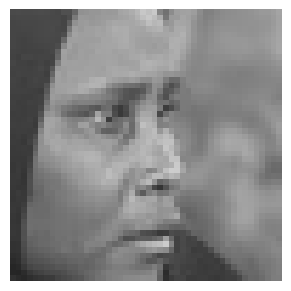

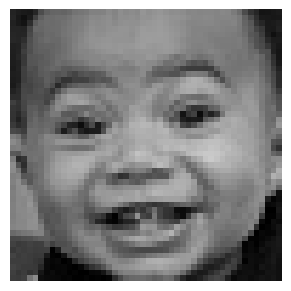

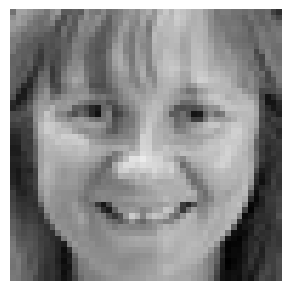

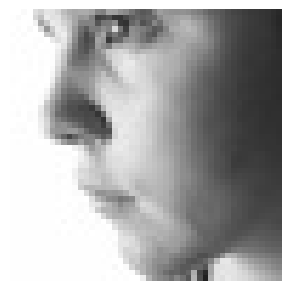

In [8]:
import cv2
import matplotlib.pyplot as plt
import random
from glob import glob

# Make sure to provide the correct path to your image files
images = glob("train/**/**")

for i in range(9):
    image_path = random.choice(images)
    img = cv2.imread(image_path)

    # Check if image is loaded successfully
    if img is None:
        print(f"Failed to load image: {image_path}")
        continue

    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.axis('off')

plt.show()


In [ ]:
# preparing data for training

In [9]:
img_size=48
batch_size=64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                              target_size = (img_size,img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = "categorical",
                                              shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                              target_size = (img_size,img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = "categorical",
                                              shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
img_size=48
batch_size=64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/" ,
                                              target_size = (img_size,img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = "categorical",
                                              shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                              target_size = (img_size,img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = "categorical",
                                              shuffle = True)

FileNotFoundError: [Errno 2] No such file or directory: 'train/'

In [ ]:
# Defining Model

In [10]:
def Convolution(input_tensor, filters, kernel_size):
  x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size= (2,2))(x)
  x = Dropout(0.25)(x)

  return x

In [11]:
def Dense_f(input_tensor,  nodes):
  x = Dense(nodes)(input_tensor)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.25)(x)

  return x

In [12]:

def model_fer(input_shape):
  inputs = Input(input_shape)
  conv_1 = Convolution(inputs,32,(3,3))
  conv_2 = Convolution(inputs,64,(5,5))
  conv_3 = Convolution(inputs,128,(3,3))

  flatten = Flatten()(conv_3)

  dense_1 = Dense_f(flatten,256)

  output = Dense(7,activation = "softmax")(dense_1)
  model = Model(inputs = [inputs], outputs = [output])

  model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])

  return model

In [13]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0     

In [ ]:
# Initializing the model

In [14]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_weights_only= True, mode = 'max', verbose = 1)
callbacks = [checkpoint]

In [ ]:
# Traninig the Model

In [ ]:
# The next cell takes time to complete

In [15]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.6481 - accuracy: 0.3739
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 512s 1s/step - loss: 1.6481 - accuracy: 0.3739 - val_loss: 1.9820 - val_accuracy: 0.2613
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3530 - accuracy: 0.4881
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 514s 1s/step - loss: 1.3530 - accuracy: 0.4881 - val_loss: 1.5774 - val_accuracy: 0.3917
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.1914 - accuracy: 0.5533
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 508s 1s/step - loss: 1.1914 - accuracy: 0.5533 - val_loss: 1.6687 - val_accuracy: 0.3528
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.0638 - accuracy: 0.6072
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 493s 1s/s

In [16]:
model.save('model_weight.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Model Evaluation

In [17]:
model.evaluate(validation_generator)

113/113 [==============================] - 27s 238ms/step - loss: 1.9455 - accuracy: 0.4971


[1.945512056350708, 0.4970743954181671]

In [ ]:
# plotting Loss

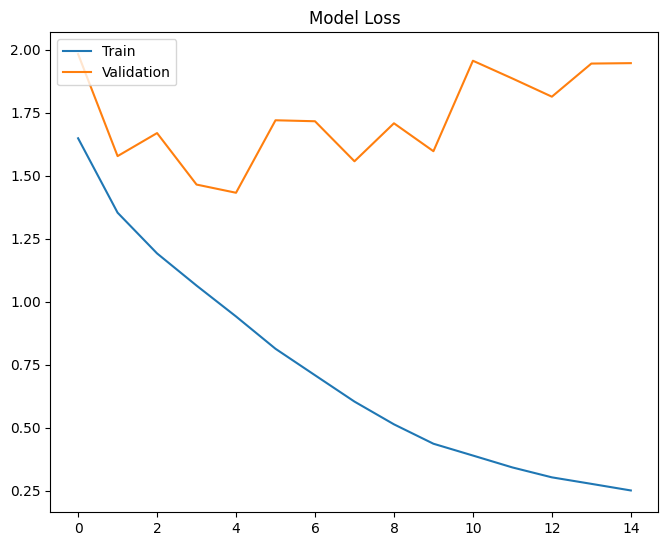

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

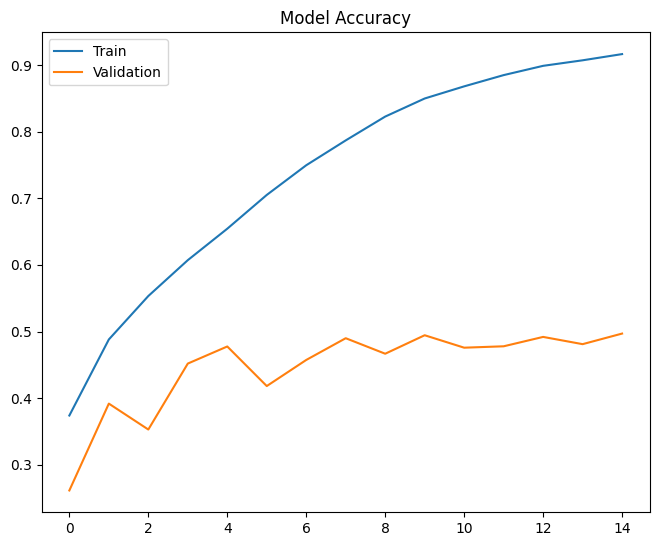

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [ ]:
# Saving Model

In [20]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
  json_file.write(model_json)